In [1]:
from IPython.core.interactiveshell import prefilter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
train=pd.read_csv('/content/SalaryData_Train.csv')

In [4]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test=pd.read_csv('/content/SalaryData_Test.csv')

In [6]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [11]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [44]:
train[train.duplicated()].shape

(3258, 14)

In [45]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,2,9,13,2,3,0,4,1,0,0,40,37,>50K
364,27,2,9,13,4,2,1,4,1,0,0,50,37,<=50K
518,24,2,11,9,4,5,4,2,0,0,0,40,37,<=50K
525,24,2,11,9,4,2,3,4,1,0,0,40,37,<=50K
619,33,2,9,13,2,3,0,4,1,0,0,40,37,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,2,11,9,2,2,0,4,1,0,0,40,37,<=50K
30118,20,2,11,9,4,6,3,4,1,0,0,40,37,<=50K
30132,22,2,15,10,4,0,3,4,1,0,0,40,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K


In [47]:
Train =train.drop_duplicates()
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [48]:
Train.isnull().sum().sum()

0

In [49]:
test[test.duplicated()].shape

(930, 14)

In [50]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,2,11,9,0,7,1,4,0,0,0,40,37,<=50K
601,32,2,11,9,2,11,0,4,1,0,0,40,37,<=50K
681,40,2,11,9,2,2,0,4,1,0,0,40,37,<=50K
799,24,2,9,13,4,9,1,4,1,0,0,35,37,<=50K
1044,44,2,14,15,2,9,0,4,1,99999,0,60,37,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,2,11,9,2,2,0,4,1,0,0,40,37,<=50K
15044,22,2,15,10,4,2,3,4,1,0,0,40,37,<=50K
15049,32,2,11,9,2,5,0,4,1,0,0,40,37,<=50K
15052,31,2,11,9,2,2,0,4,1,0,0,40,37,<=50K


In [51]:
Test=test.drop_duplicates()

In [52]:
Test.isnull().sum().sum()


0

In [53]:
Train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [55]:
Test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

In [56]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
0,2816,475
1,8,1
2,2472,757
3,1903,1743
4,843,114
5,1081,78
6,1442,223
7,2782,132
8,140,1


In [57]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
0,573,356
1,1421,593
2,14902,4311
3,466,583
4,1733,698
5,914,339
6,14,0


In [58]:
pd.crosstab(Train['workclass'],Train['occupation'])

occupation,0,1,2,3,4,5,6,7,8,9,10,11,12,13
workclass,,,,,,,,,,,,,,
0,309,9,62,175,8,22,14,34,0,165,27,14,66,24
1,277,0,139,211,28,46,11,187,0,667,291,7,38,112
2,2378,0,2391,2333,430,1064,1581,2370,141,2042,185,2530,669,1099
3,28,0,97,369,51,2,10,27,0,156,5,275,3,26
4,49,0,487,375,419,15,35,173,0,360,6,368,26,118
5,247,0,52,183,15,9,13,122,0,393,112,11,56,40
6,3,0,1,0,6,1,1,1,0,0,0,0,0,1


<Axes: xlabel='occupation'>

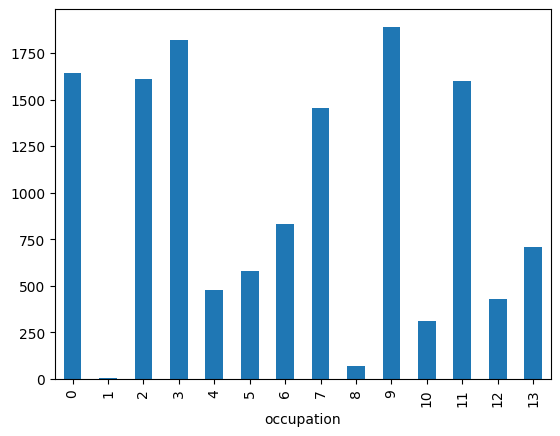

In [59]:
pd.crosstab(Train['Salary'],Train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='education'>

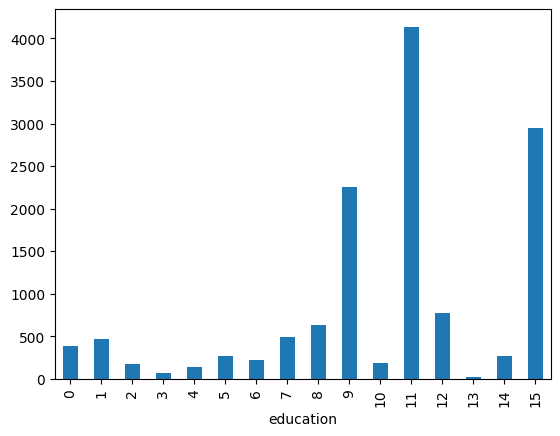

In [60]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

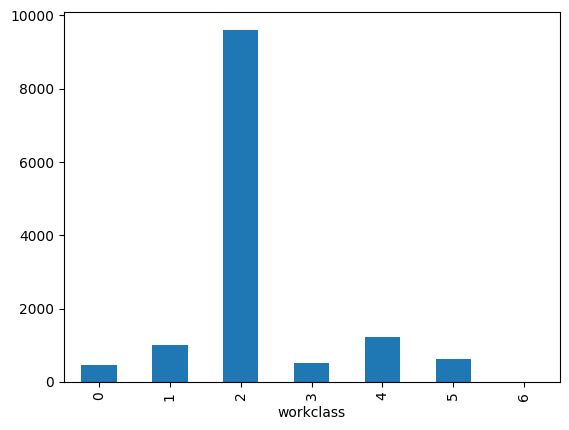

In [61]:
pd.crosstab(Train['Salary'],Train['workclass']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

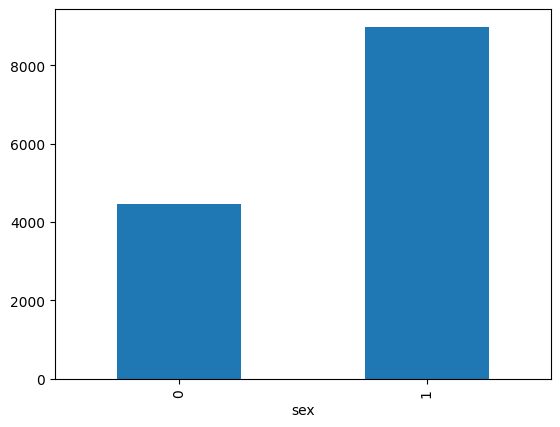

In [62]:
pd.crosstab(Train['Salary'],Train['sex']).mean().plot(kind='bar')

In [73]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [ ]:
#convert cateorical variables by encoding
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [75]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [76]:
Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [77]:
##Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [78]:
len(colnames)

14

In [79]:
Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [ ]:
Test

In [68]:
Test['maritalstatus'].value_counts()

2    6490
4    4501
0    2026
5     470
6     450
3     182
1      11
Name: maritalstatus, dtype: int64

In [82]:
# storing the values in x_train,y_train,x_test & y_test for spliting the data in train and test for analysis
x_train = Train[colnames[0:13]].values
y_train = Train[colnames[13]].values
x_test = Test[colnames[0:13]].values
y_test = Test[colnames[13]].values

In [88]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [89]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]])

In [90]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]])

In [91]:
y_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [92]:
y_test

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

Apply  Naive Bayes for Classification

In [93]:
#prepar NaiveBayes Model on Training data set
from sklearn.naive_bayes import MultinomialNB as MB

M_model=MB()
train_pred_multi=M_model.fit(x_train,y_train).predict(x_train)
test_pred_multi=M_model.fit(x_train,y_train).predict(x_test)

In [98]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi ## train accuracy 76.83

0.7683158012117608

In [100]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi ## test accuracy 77.33

0.7733899504600141

In [107]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [108]:
confusion_matrix

array([[10151,   469],
       [ 2733,   777]])

In [109]:
#GaussianNB for numerical data
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

In [110]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau ## train accuracy 79.33

0.7933687692822362

In [111]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau ## test accuracy 79.51

0.7951875442321302

In [112]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [113]:
confusion_matrix

array([[10056,   564],
       [ 2330,  1180]])

In [115]:
#calculating the accuracy of this model w.r.t. this dataset
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.7951875442321302
